In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
import cv2 



```
# This is formatted as code
```

# Initialisation FCM image

In [2]:
path = 'im1.jpg'
img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
epsilon  = 0.01
num_clusters = 2
num_pixels = img.size 
max_iter  = 100 
m = 2
X = img.flatten().astype('float')
epsilon = 0.01 

In [4]:
X.shape

(65536,)

In [ ]:
def initialize() : 
  U=np.random.normal(3, 2.5, size=(num_pixels,num_clusters ))

  return U

In [ ]:
def Update_U(C): 
  c_index,x_index = np.meshgrid(C,X)
  print(c_index,' ',x_index)
  power = 2./(m-1)
  p1 = abs(x_index-c_index)**power

  p2 = np.sum((1./abs(x_index-c_index))**power,axis=1)
  
  return 1./(p1*p2[:,None])

In [ ]:
def Calculate_Center(U): 
    return np.dot(X,U**m) / np.sum(U**m,axis=0)




In [ ]:
U = initialize()
i = 0 
while True : 
  C = Calculate_Center(U)
  print (C)
  U_copy = np.array(U, copy=True)
  U = Update_U(C)
  
  distance = np.sum(abs(U - U_copy))
  if distance < epsilon or i > max_iter : 
    break 
  i+= 1

J_m = np.argmax(U,axis=1)
result =  J_m.reshape(img.shape).astype('int')
print('Number it : ',i)






[145.34822192 145.2345958 ]
[[145.34822192 145.2345958 ]
 [145.34822192 145.2345958 ]
 [145.34822192 145.2345958 ]
 ...
 [145.34822192 145.2345958 ]
 [145.34822192 145.2345958 ]
 [145.34822192 145.2345958 ]]   [[ 90.  90.]
 [ 88.  88.]
 [ 85.  85.]
 ...
 [122. 122.]
 [121. 121.]
 [120. 120.]]
[145.51611737 145.06229182]
[[145.51611737 145.06229182]
 [145.51611737 145.06229182]
 [145.51611737 145.06229182]
 ...
 [145.51611737 145.06229182]
 [145.51611737 145.06229182]
 [145.51611737 145.06229182]]   [[ 90.  90.]
 [ 88.  88.]
 [ 85.  85.]
 ...
 [122. 122.]
 [121. 121.]
 [120. 120.]]
[146.18836825 144.39749604]
[[146.18836825 144.39749604]
 [146.18836825 144.39749604]
 [146.18836825 144.39749604]
 ...
 [146.18836825 144.39749604]
 [146.18836825 144.39749604]
 [146.18836825 144.39749604]]   [[ 90.  90.]
 [ 88.  88.]
 [ 85.  85.]
 ...
 [122. 122.]
 [121. 121.]
 [120. 120.]]
[148.67872912 141.8664053 ]
[[148.67872912 141.8664053 ]
 [148.67872912 141.8664053 ]
 [148.67872912 141.8664053 ]
 ..

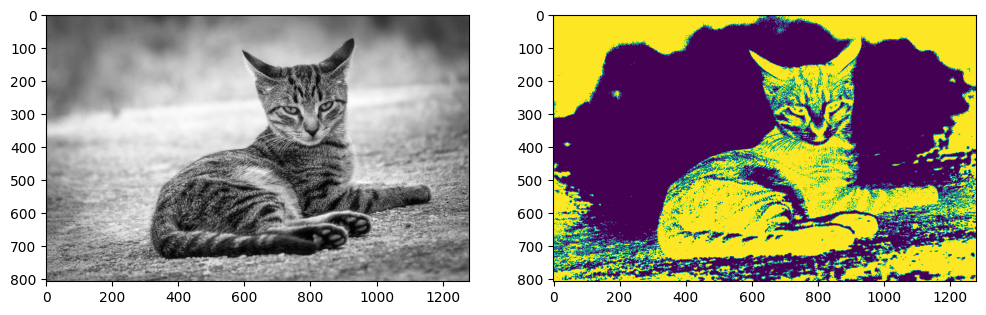

In [ ]:
fig=plt.figure(figsize=(12,8),dpi=100)
            
ax1=fig.add_subplot(1,2,1)
ax1.imshow(img,cmap='gray')

ax2=fig.add_subplot(1,2,2)
ax2.imshow(result)

plt.show(block=False)
plt.close()